# Personal Project : Classification of Sincere/Insincere Questions on Quora

**Prepared by:** Daniel Han<br>
**Prepared for:** Brainstation

## 0. Contents

Below is a list of contents showing how this and the following notebooks documenting the project execution are structured:

1. Introduction<br>
2. Procedure<br>
3. Limitations and Assumptions<br>
4. References / Disclaimer<br>
5. Project Execution
    - 5.1 Data Acquisition and Cleaning
    - 5.2 Data Transformation & Cleaning
    - 5.3 Exploratory Data Analysis (EDA)
    - 5.4 Bag-of-Word / Tf-Idf Model
        - 5.4.1 Train/Test Split
        - 5.4.2 Multinomial Naive Bayes
        - 5.4.3 Logistic Regression
    - 5.5 Word2Vec Model
        - 5.5.1 Fitting W2V Model
        - 5.5.2 Logistic Regression
        - 5.5.3 Random Forest
    - 5.6 Model Comparison
    - 5.7 Prediction & Review

## 1. Introduction

Quora is a social question-and-answer website based in Mountain View, California, where users can collaborate by editing questions and commenting on answers that have been submitted by other users.

While the convenience that anyone can post and edit questions on the forum allows users to dynamically engage in the service, the downside is that some users may post insincere questions which would compromise the reliability of the website and/or degrade other groups of individuals.

In this hypothetical project, the characteristics of insincere questions on Quora are studied using machine learning techniques, and a classification model predicting whether or not a question in sincere is created based on the underlying logic.

## 2. Procedure

While the process of analysis and modelling were iterative, the following procedure was taken throughout:

**1. Data Acquisition:** Two sets of data are provided by Quora in csv format:


   - A train set of 1,306,122 questions on Quora along with the target variables indicating whether each of the questions was sincere or not. The classification model is trained based on this set;
   
   
   - A test set of 375,806 questions for the classification model to predict the sincerity of.
   
The data was made publicly available in the following link:
    https://www.kaggle.com/competitions/quora-insincere-questions-classification/data

**2. Data Transformation & Cleaning:** The texts of the questions in the training dataset are cleaned of punctuations, contractions, stopwords and special characters, and subsequently lemmatized for the analysis and modelling purposes. They are then tokenized to be fed into the machine learning models.

**3. Exploratory Data Analysis (EDA)**: The keywords frequently appearing in sincere and insincere questions are reviewed, along with their importances in a document. Based on the findings, the key characteristics of insincere questions are studied.

**4. Bag-of-Words/Tf-Idf Model:** The train set is further split into the train and test set. Subsequently, with the BoW/TfIdf algorithms used in the EDA, several binary classification models are created. Measures such as precision, recall, and F-1 score are reviewed to evaluate the performance of the models. 

**6. Word2Vec Model:** Another machine learning algorithm, Word2Vec by Google, is employed to create an alernative model to the Bow/TfIdf model. Precision, recall, and F-1 score are evaluated and compared against the Bow/TfIdf model. The model with the highest precision is selected as the final model

**7. Prediction**: Using the final model, each question in the test set is classified as either sincere or insincere. Some of the questions are randomly sampled and reviewed to determine whether the decision is consistent with the observations from the EDA.

## 3. Limitations and Assumptions

The limitations and assumptions are discussed throughout the documentation.

1. Certain classification algorithms (such as Support Vector Machines) were not employed in this documentation due to the excessively long runtime. Only the algorithms with reasonable runtimes were considered in this analysis.


2. This analysis depends solely on the dataset provided which only contains text data and no other information. Other factors, such as the location, time, or any other information about the people posting the questions, are not considered in this analysis. 


3. This notebook is not the final version and will constantly be updated and revised for the better performance in the Agile manner. 

## 4. References / Disclaimer

This project was publicly posted by Quora on Kaggle, a data science competition platform (URL below): 

https://www.kaggle.com/competitions/quora-insincere-questions-classification

The classification modelling using Word2Vec, was referenced from the following source: https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381

No other competitors' work on this project was referenced during the execution and will not be through the future revisions this document.



## 5. Project Execution

This Section of the notebook documents the entire project execution process and discuss the findings.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### 5.1 Data Acquisition and Cleaning

#### 5.1.1 Read in csv

The provided train set is read in.

In [3]:
# Read in csv
df = pd.read_csv('train.csv', index_col = 0)

In [4]:
# Review DataFrame
df.head()

question_text  \
qid                                                                       
00002165364db923c7e6  How did Quebec nationalists see their province...   
000032939017120e6e44  Do you have an adopted dog, how would you enco...   
0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

                      target  
qid                           
00002165364db923c7e6       0  
000032939017120e6e44       0  
0000412ca6e4628ce2cf       0  
000042bf85aa498cd78e       0  
0000455dfa3e01eae3af       0

#### 5.1.2 Basic Information about Data

The dataframe is briefly reviewed as to its shape, datatypes, presence of null values (NaN), value counts, and duplicates.

In [5]:
# Review Shape
df.shape

(1306122, 2)

In [6]:
# Review info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306122 entries, 00002165364db923c7e6 to ffffed09fedb5088744a
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   question_text  1306122 non-null  object
 1   target         1306122 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 29.9+ MB


The datatypes are reasonable (object for question text column, int for the target column)

In [7]:
# Review NaN
df.isna().sum()

question_text    0
target           0
dtype: int64

In [8]:
# Review count of each value 
df.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [9]:
# Review proportions of the target values
print(f'Approximately {round(df.target.mean() * 100, 2)} % of the entire question set are insincere questions.')

Approximately 6.19 % of the entire question set are insincere questions.


In [10]:
# Check duplicated rows
print(f'There are {df.duplicated().sum()} duplicated rows.')

There are 0 duplicated rows.


#### 5.1.3 Text Preprocessing

The text data is tokenized using the Genism library

In [11]:
# Change text to lowercase
df['question_text'] = df['question_text'].str.lower()

In [12]:
# Import Genism library
import gensim

In [13]:
# Tokenize questions using genism.utils.simple_preprocess()
df['question_text'] = df['question_text'].apply(lambda x : gensim.utils.simple_preprocess(x))

In [14]:
# Review dataframe with tokenized column
df.head()

question_text  \
qid                                                                       
00002165364db923c7e6  [how, did, quebec, nationalists, see, their, p...   
000032939017120e6e44  [do, you, have, an, adopted, dog, how, would, ...   
0000412ca6e4628ce2cf  [why, does, velocity, affect, time, does, velo...   
000042bf85aa498cd78e  [how, did, otto, von, guericke, used, the, mag...   
0000455dfa3e01eae3af  [can, convert, montra, helicon, to, mountain, ...   

                      target  
qid                           
00002165364db923c7e6       0  
000032939017120e6e44       0  
0000412ca6e4628ce2cf       0  
000042bf85aa498cd78e       0  
0000455dfa3e01eae3af       0

Then, the tokenized question_text is combined again to a string for two purposes:
1) To be cleaned of stopwords which do not add meanings or sentiment to a document, and <br>
2) To be lemmatized (e.g., changes -> change)

In [15]:
# The following code is only required if nltk packages are not already installed.
# import nltk
# nltk.download()

In [16]:
# Convert tokenized text column to a single string
df['question_text'] = df['question_text'].apply(lambda x : ' '.join(x))

In [17]:
# Import libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy

In [18]:
# Loading spacy library
nlp=spacy.load("en_core_web_sm")

# Creating an instance of lemmatizer
lemma=WordNetLemmatizer()

In [19]:
# Creating list of stopwords from both SpaCy and NLTK

# Stopwords of SpaCy
stopwords_nlp = nlp.Defaults.stop_words

# Stopwords of NLTK
stopwords_nltk = stopwords.words('english')

#combining the stopword list
Stopwords = set((set(stopwords_nlp)|set(stopwords_nltk)))

In [20]:
# Create a column that cleans and lemmatizes text
def stopword_lemmatize_characters(text: str):
    
    words = ""
    
    # Lemmatize all words (e.g., changing, changed, changes -> change) and drop stopwords
    for word in text.split():
        if word not in Stopwords:
            words += lemma.lemmatize(word) + " "
    
    
    new_string = words.strip()
    
    return new_string

In [21]:
# Apply function to all elements in text column 
df['question_text'] = df.question_text.apply(stopword_lemmatize_characters)

In [22]:
# Review final column to be analyzed/modelled
df.head()

question_text  \
qid                                                                       
00002165364db923c7e6                 quebec nationalist province nation   
000032939017120e6e44            adopted dog encourage people adopt shop   
0000412ca6e4628ce2cf  velocity affect time velocity affect space geo...   
000042bf85aa498cd78e             otto von guericke magdeburg hemisphere   
0000455dfa3e01eae3af  convert montra helicon mountain bike changing ...   

                      target  
qid                           
00002165364db923c7e6       0  
000032939017120e6e44       0  
0000412ca6e4628ce2cf       0  
000042bf85aa498cd78e       0  
0000455dfa3e01eae3af       0

#### 5.1.4 Wordcloud

A wordcloud showing the most frequent and relevant words are plotted in this subsection.

In [23]:
# Import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

#### Wordcloud of Sincere Questions

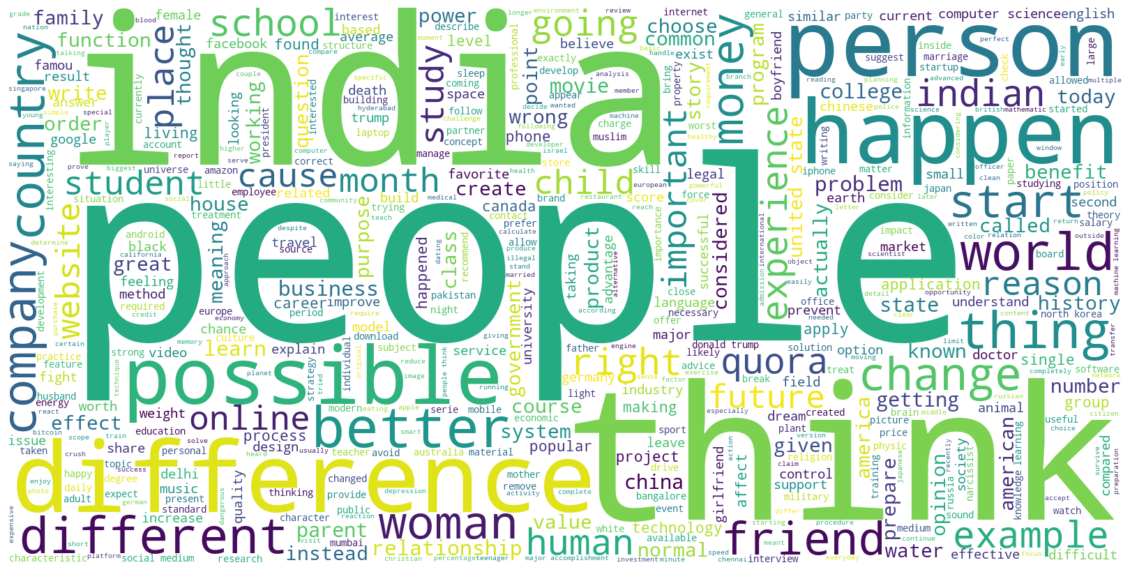

In [24]:
# Wordcloud of sincere questions
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5,background_color='white').generate(" ".join(df[df.target == 0].question_text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')
plt.show()

#### Wordcloud for Insincere Questions

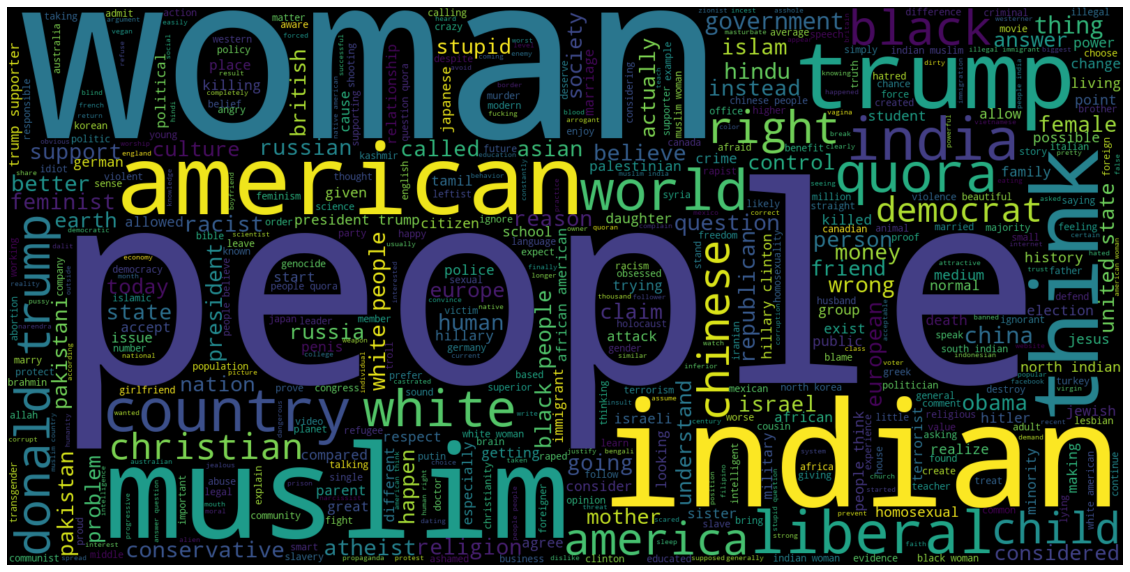

In [25]:
# Wordcloud of insincere questions
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5,background_color="black").generate(" ".join(df[df.target == 1].question_text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')
plt.show()

#### 5.1.5 BoW/Tf-Idf

#### Bag of Words (BoW)

The top most frequently-occurring words are reviewed in the descending order using bag-of-words.

In [26]:
# Import Scikit Learn Library
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# Divide Dataframe to those with sincere and insincere questions
df_insincere = df[df['target'] == 1]
df_sincere = df[df['target'] == 0]

In [28]:
# Fit text columns to count vectorizer
bow_transformer_insincere=CountVectorizer().fit(df_insincere['question_text'])
bow_transformer_sincere=CountVectorizer().fit(df_sincere['question_text'])

In [29]:
# Total number of different words present in the corpus
print(f'Number of words in Dataframe with Insincere Questions : {len(bow_transformer_insincere.vocabulary_)}')
print(f'Number of words in Dataframe with Sincere Questions : {len(bow_transformer_sincere.vocabulary_)}')

Number of words in Dataframe with Insincere Questions : 32224
Number of words in Dataframe with Sincere Questions : 161636


In [30]:
# Apply bag-of-word transformer to the text column to create BoW Matrices
text_bow_insincere=bow_transformer_insincere.transform(df_insincere['question_text'])
text_bow_sincere=bow_transformer_sincere.transform(df_sincere['question_text'])

In [31]:
# Convert Sparse Matrices to Dataframes
bow_df_insincere = pd.DataFrame.sparse.from_spmatrix(text_bow_insincere, index=None, columns=None)
bow_df_sincere = pd.DataFrame.sparse.from_spmatrix(text_bow_sincere, index=None, columns=None)

In [32]:
# Swap Keys and Values in the BoW Transformer vocabulary
bow_transformer_vocab_swapped_insincere = {y: x for x, y in bow_transformer_insincere.vocabulary_.items()}
bow_transformer_vocab_swapped_sincere = {y: x for x, y in bow_transformer_sincere.vocabulary_.items()}

In [33]:
# Rename BoW Dataframes using the swapped dictionaries created above
bow_df_insincere.rename(columns = bow_transformer_vocab_swapped_insincere, inplace = True)
bow_df_sincere.rename(columns = bow_transformer_vocab_swapped_sincere, inplace = True)

In [34]:
# Import plotly
import plotly.express as px

In [35]:
# Display Total Occurrences of words in descending order (Show Top  50) - Sincere Questions
top50_bow_sincere = (bow_df_sincere.sum(axis = 0).sort_values(ascending = False))[:50]

# Display result
fig = px.bar(x = top50_bow_sincere.index, y = top50_bow_sincere.values, labels = {'x' : 'Keyword', 'y' : 'Count'},
             title = 'Top 50 Most Frequently-Occuring Words - Sincere Questions', width = 1000, height = 600)
fig.show()

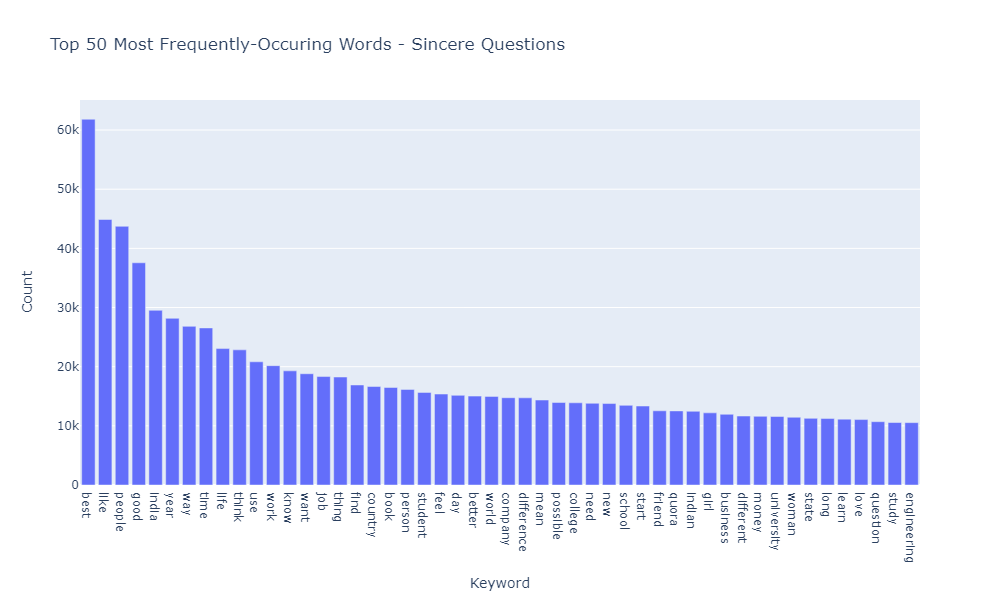

In [36]:
# Display Total Occurrences of words in descending order (Show Top  50) - Insincere Questions
top50_bow_insincere = (bow_df_insincere.sum(axis = 0).sort_values(ascending = False))[:50]

# Display result
fig = px.bar(x = top50_bow_insincere.index, y = top50_bow_insincere.values, labels = {'x' : 'Keyword', 'y' : 'Count'},
             title = 'Top 50 Most Frequently-Occuring Words - Insincere Questions', width = 1000, height = 600)
fig.show()

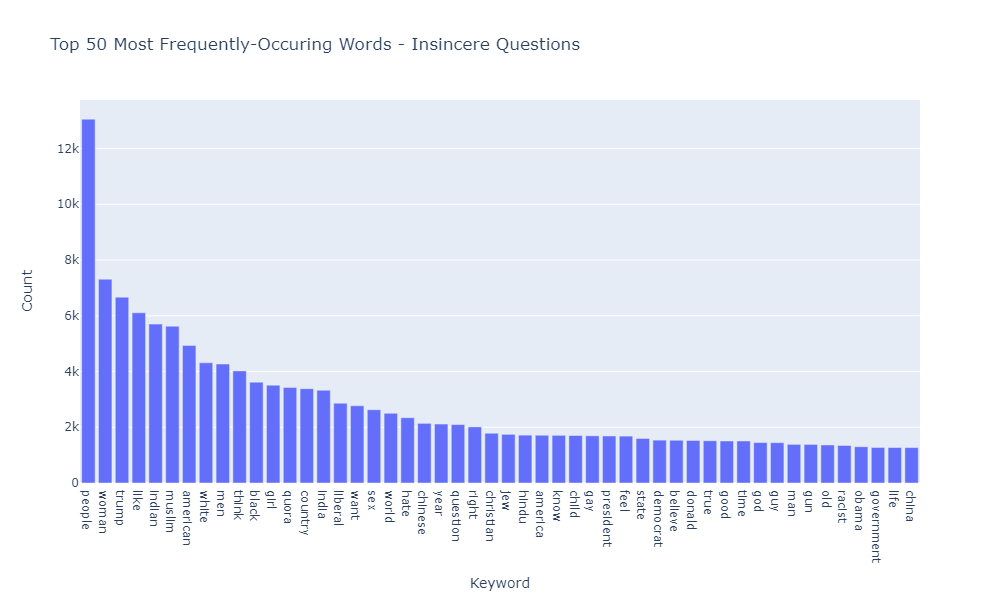

Among the top frequently-occurring and relevant kerywords in insincere questions,

- 6 were related to a particular country (Indian, American, India, Chinese, America, China),
- 6 were related to politics, politician, or a political party or view (Trump, Liberal, President, Democrat, Obama, Donald, Government)
- 3 were racial (white, black, racist)
- 4 were related to religions (Muslim, Christian, Jew, Hindu)
- 7 were related to a certain sex, gender, or sexual orientation (woman, men, girl, sex, gay, guy, man)
- 3 were related to hatred and violence (hate, racist, gun)

The frequencies of words in the categories in sincere questions are as follows:

- 2 related to a particular country (India, Indian)
- 0 related to politics, politician, or a political party or view
- 0 racial
- 0 related to religions
- 2 related to a certain sex, gender, or sexual orientation (girl, woman)
- 0 related to hatred and violence

In sincere questions, the following were observed:

- The word 'best' is the most frequent word, and similar words such as good and better are also among the top 50 - it is likely that people frequently consider multiple options and would like to be recommended the best.
- 11 were related to education and career (work, job, student, college, school, business, university, learn, book, study, engineering)

#### Tf-Idf

Following the bag-of-words method, the term-frequency-inverse-document-frequecy (TF-IDF) analysis is conducted to review which words are teypically important in a review.

In [37]:
# Import TF-IDF library
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
# Fit TF-IDF model using the BoW sparse matrix - insincere questions 
tfidf_transformer_insincere = TfidfTransformer().fit(text_bow_insincere)
# Create a  Tf-IDF sparse matrix model from TF-IDF model - sincere questions
tfidf_insincere = tfidf_transformer_insincere.transform(text_bow_insincere)

# Fit TF-IDF model using the BoW sparse matrix - sincere questions 
tfidf_transformer_sincere=TfidfTransformer().fit(text_bow_sincere)
# Create a  TF-IDF sparse matrix model from TF-IDF model - sincere questions
tfidf_sincere = tfidf_transformer_sincere.transform(text_bow_sincere)

In [39]:
# Convert TF-IDF sparse matrix into dataframe - insincere questions
tfidf_df_insincere = pd.DataFrame.sparse.from_spmatrix(tfidf_insincere, index=None, columns=None)
# Convert TF-IDF sparse matrix into dataframe - sincere questions
tfidf_df_sincere = pd.DataFrame.sparse.from_spmatrix(tfidf_sincere, index=None, columns=None)

In [40]:
# Rename columns - insincere questions
tfidf_df_insincere.rename(columns = bow_transformer_vocab_swapped_insincere, inplace = True)
# Rename columns - sincere questions
tfidf_df_sincere.rename(columns = bow_transformer_vocab_swapped_sincere, inplace = True)

In [41]:
# Display Total Occurrences of words in descending order (Show Top  50) - Sincere Questions
top50_tfidf_sincere = (tfidf_df_sincere.mean(axis = 0).sort_values(ascending = False))[:50]

# Display result
fig = px.bar(x = top50_tfidf_sincere.index, y = top50_tfidf_sincere.values, labels = {'x' : 'Keyword', 'y' : 'Count'},
             title = 'Top 50 Most Relevant Words - Sincere Questions', width = 1000, height = 600)
fig.show()

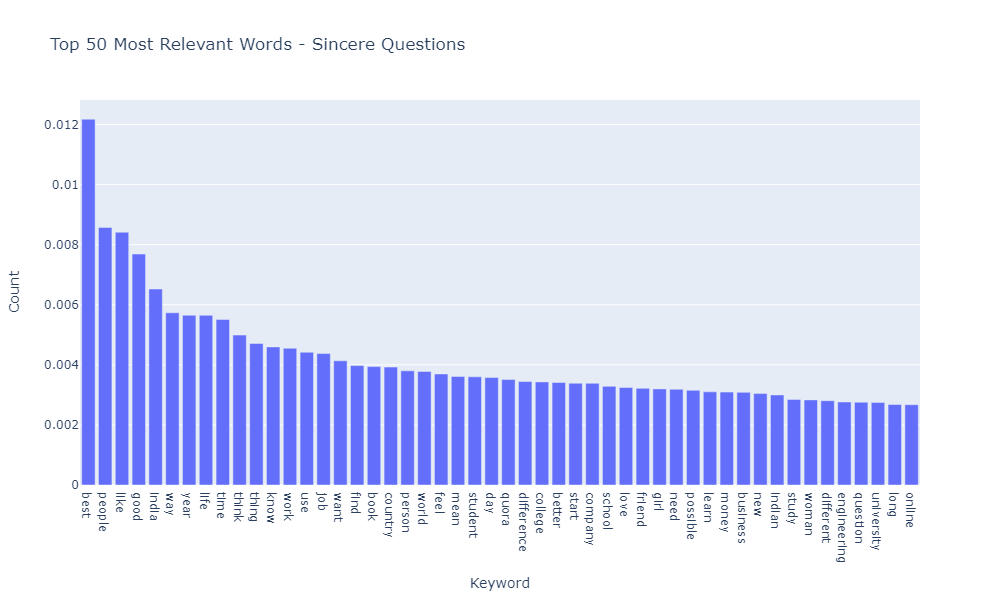

In [102]:
# Display Total Occurrences of words in descending order (Show Top  50) - Sincere Questions
top50_tfidf_insincere = (tfidf_df_insincere.mean(axis = 0).sort_values(ascending = False))[:50]

# Display result
fig = px.bar(x = top50_tfidf_insincere.index, y = top50_tfidf_insincere.values, labels = {'x' : 'Keyword', 'y' : 'Count'},
             title = 'Top 50 Most Relevant Words - Insincere Questions', width = 1000, height = 600)
fig.show()

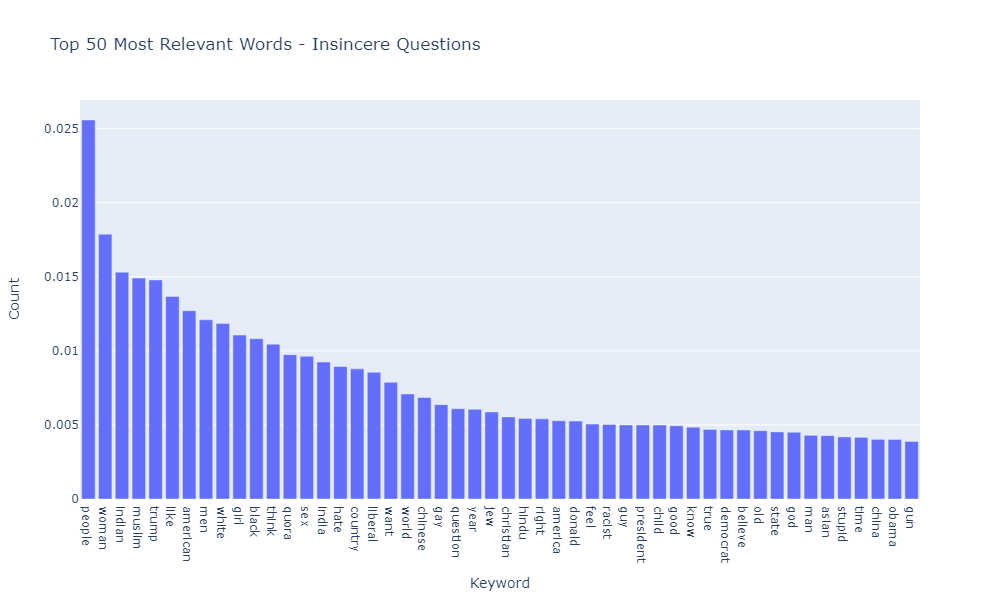

Similar results are observed using the Tf-Idf method.

#### Probability of Finding a Keyword in Sincere / Insincere Questions

Using the controversial keywords observed in insincere questions, the probabilities of finding such keywords in sincere and insincere questions are compared. Also, the p-values associated with the proportions z-test between the two observations are computed and displayed.

In [43]:
# Add keywords to review
keywords = ['indian', 'american', 'india', 'chinese', 'america', 'china', 'trump', 'liberal', \
            'president', 'democrat', 'obama', 'donald', 'government', 'white', 'black', 'racist', \
            'muslim', 'christian', 'jew', 'hindu', 'woman', 'men', 'girl', 'sex', 'gay', 'guy', 'man', 'hate', 'gun']

In [44]:
# Import Plotly Graphic Objects & Subplot Library
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [45]:
# This function checks whether a certain keyword appears in a question text
def word_in_text(word: str, text: str):
    if word in text.split():
        return True
    else:
        return False

In [46]:
# Import statsmodels proportion_z_test
from statsmodels.stats.proportion import proportions_ztest

In [47]:
# Create a list of keywords with the first letter capitalized for subplot titles
keyword_upper = []

for i in range(len(keywords)):
    newstring = keywords[i][0].upper() + keywords[i][1:]
    keyword_upper.append(newstring)

# Total numbers of rows and columns 
total_cols = 3
total_rows = len(keywords) // total_cols + 1 if len(keywords) // total_cols != 0 else len(keywords) // total_cols

# Create a figure of subplots
fig = make_subplots(rows=total_rows, cols=total_cols, subplot_titles = keyword_upper)

# Loop over each keyword and plot percentages of sincere/insincere questions containing the keyword 
for i in range(len(keywords)):
    
    # Whether keyword exists in DataFrame of sincere questions (True or False)
    sincere_appearance = df.loc[df['target'] == 0,'question_text'].apply(lambda x : word_in_text(keywords[i], x))
    # Proportion of sincere questions containing keyword in DataFrame
    sincere_proportion = sincere_appearance.mean()
    # Count of all sincere questions containing keyword
    count_sincere = sincere_appearance.sum()
    # Count of all sincere questions
    nobs_sincere = len(sincere_appearance)
    
    # Whether keyword exists in DataFrame of insincere questions (True or False)
    insincere_appearance = df.loc[df['target'] == 1,'question_text'].apply(lambda x : word_in_text(keywords[i], x))
    # Proportion of insincere questions containing keyword in DataFrame
    insincere_proportion = insincere_appearance.mean()
    # Count of all insincere questions containing keyword
    count_insincere = insincere_appearance.sum()
    # Count of all insincere questions
    nobs_insincere = len(insincere_appearance)
    
    # Create traces
    trace_sincere = go.Bar(x = [0.5], y = [sincere_proportion], 
                             marker_color='lightsalmon')    
    trace_insincere = go.Bar(x = [1.5], y = [insincere_proportion], 
                             marker_color='crimson')
    
    # Calculate Z score
    count = np.array([count_sincere, count_insincere])
    nobs = np.array([nobs_sincere, nobs_insincere]) 
    z = proportions_ztest(count, nobs)[1]
    
    # Row & column numbers
    num_row = ((i + 1) // total_cols) + 1 if (i + 1) % total_cols != 0 else (i + 1) // total_cols
    num_col = total_cols if (i + 1) % total_cols == 0 else (i + 1) % total_cols
    
    # Append traces
    fig.append_trace(trace_sincere, row = num_row, col = num_col)
    fig.append_trace(trace_insincere, row = num_row, col = num_col)
    
    # Axis formatting for each subplot
    fig.update_xaxes(title_text = f'Sincerity(z = {round(z, 3)})', tickvals = [0.5, 1.5], ticktext = ['Sincere', 'Insincere'],
                     row = num_row, col = num_col)
    fig.update_yaxes(title_text = 'Percentage', title_standoff = 0, tickformat = ',.1%',
                     row = num_row, col = num_col)

# Global formatting
fig.update_layout(height=2000, width=1000, showlegend = False, title = 'Percentages of Sincere/Insincere\
 Questions Containing Keyword in Question')

# Show
fig.show()

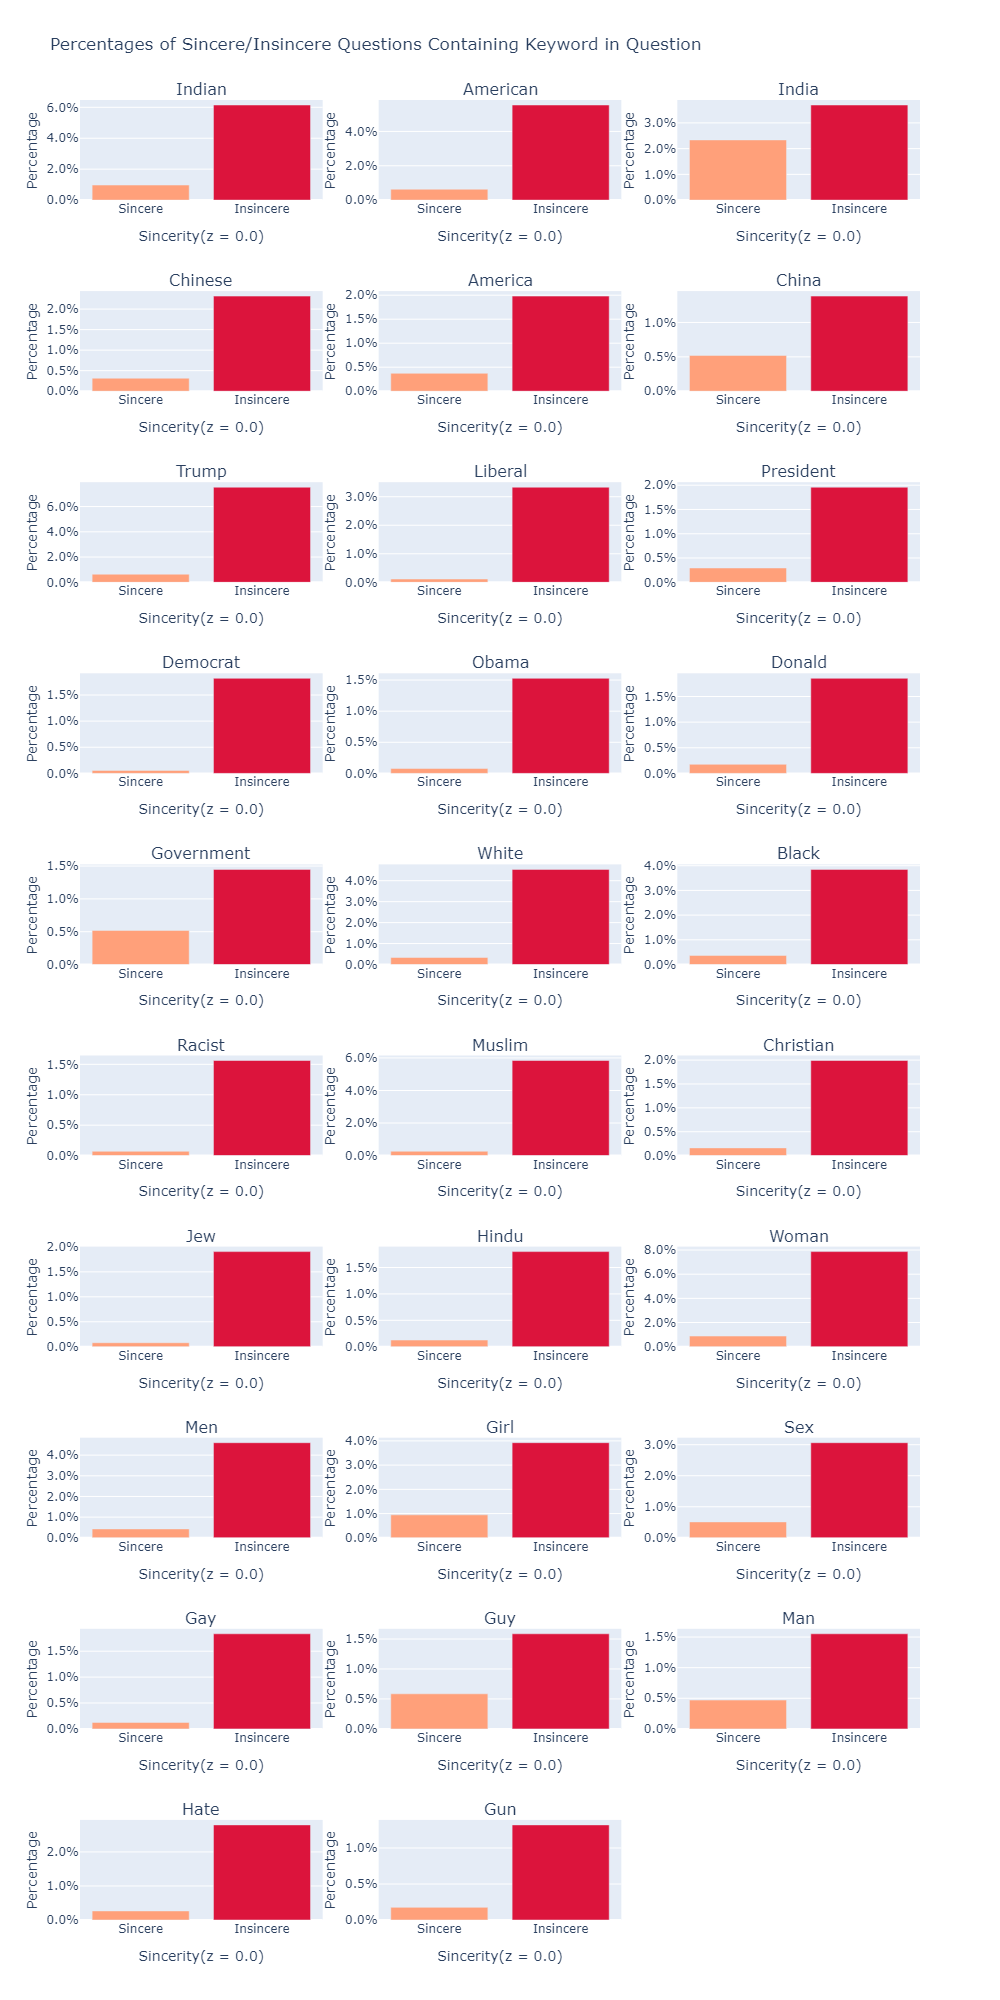

Visually, the controversial keywords appear noticeably more frequently in insincere questions than in sincere questions. The z-scores shown in the graph are all close to zeros which indicate that, assuming there is no difference in proportion, the probability of observing the difference is very low.

#### Probability of Finding a Random Word in Sincere / Insincere Questions

To compare these z-scores of the keywords against those of other words, the same procedure is repeated with randomly drawn words.

In [48]:
# Import random library
import random

In [49]:
# Fix random seed so that consistent result can be illustrated in this notebook
random.seed(1230)

# Create a dictionary of English words
vocab = list(nlp.vocab.strings)

# Draw random words
random_words = random.choices(vocab, k = 10)

In [50]:
# Create a new set of keywords, all lowercased
keywords = []
for i in random_words:
    new_lower = i.lower()
    keywords.append(new_lower)

In [51]:
# Show randomly drawn words
print(keywords)

['escalation', 'umlaut', 'cheerfully', 'choosing', 'kern', 'godot', 'bent', 'disruptions', 'grumbles', 'studio']


In [52]:
# Create a list of keywords with the first letter capitalized for subplot titles
keyword_upper = []

for i in range(len(keywords)):
    newstring = keywords[i][0].upper() + keywords[i][1:]
    keyword_upper.append(newstring)

# Total numbers of rows and columns 
total_cols = 3
total_rows = len(keywords) // total_cols + 1 if len(keywords) // total_cols != 0 else len(keywords) // total_cols

# Create a figure of subplots
fig = make_subplots(rows=total_rows, cols=total_cols, subplot_titles = keyword_upper)

# Loop over each keyword and plot percentages of sincere/insincere questions containing the keyword 
for i in range(len(keywords)):
    
    # Whether keyword exists in DataFrame of sincere questions (True or False)
    sincere_appearance = df.loc[df['target'] == 0,'question_text'].apply(lambda x : word_in_text(keywords[i], x))
    # Proportion of sincere questions containing keyword in DataFrame
    sincere_proportion = sincere_appearance.mean()
    # Count of all sincere questions containing keyword
    count_sincere = sincere_appearance.sum()
    # Count of all sincere questions
    nobs_sincere = len(sincere_appearance)
    
    # Whether keyword exists in DataFrame of insincere questions (True or False)
    insincere_appearance = df.loc[df['target'] == 1,'question_text'].apply(lambda x : word_in_text(keywords[i], x))
    # Proportion of insincere questions containing keyword in DataFrame
    insincere_proportion = insincere_appearance.mean()
    # Count of all insincere questions containing keyword
    count_insincere = insincere_appearance.sum()
    # Count of all insincere questions
    nobs_insincere = len(insincere_appearance)
    
    # Create traces
    trace_sincere = go.Bar(x = [0.5], y = [sincere_proportion], 
                             marker_color='lightsalmon')    
    trace_insincere = go.Bar(x = [1.5], y = [insincere_proportion], 
                             marker_color='crimson')
    
    # Calculate Z score
    count = np.array([count_sincere, count_insincere])
    nobs = np.array([nobs_sincere, nobs_insincere]) 
    z = proportions_ztest(count, nobs)[1]
    
    # Row & column numbers
    num_row = ((i + 1) // total_cols) + 1 if (i + 1) % total_cols != 0 else (i + 1) // total_cols
    num_col = total_cols if (i + 1) % total_cols == 0 else (i + 1) % total_cols
    
    # Append traces
    fig.append_trace(trace_sincere, row = num_row, col = num_col)
    fig.append_trace(trace_insincere, row = num_row, col = num_col)
    
    # Axis formatting for each subplot
    fig.update_xaxes(title_text = f'Sincerity(z = {round(z, 2)})', tickvals = [0.5, 1.5], ticktext = ['Sincere', 'Insincere'],
                     row = num_row, col = num_col)
    fig.update_yaxes(title_text = 'Percentage', title_standoff = 0, tickformat = ',.3%',
                     row = num_row, col = num_col)

# Global formatting
fig.update_layout(height=1000, width=1000, showlegend = False, title = 'Percentages of Sincere/Insincere\
 Questions Containing Keyword in Question')

# Show
fig.show()

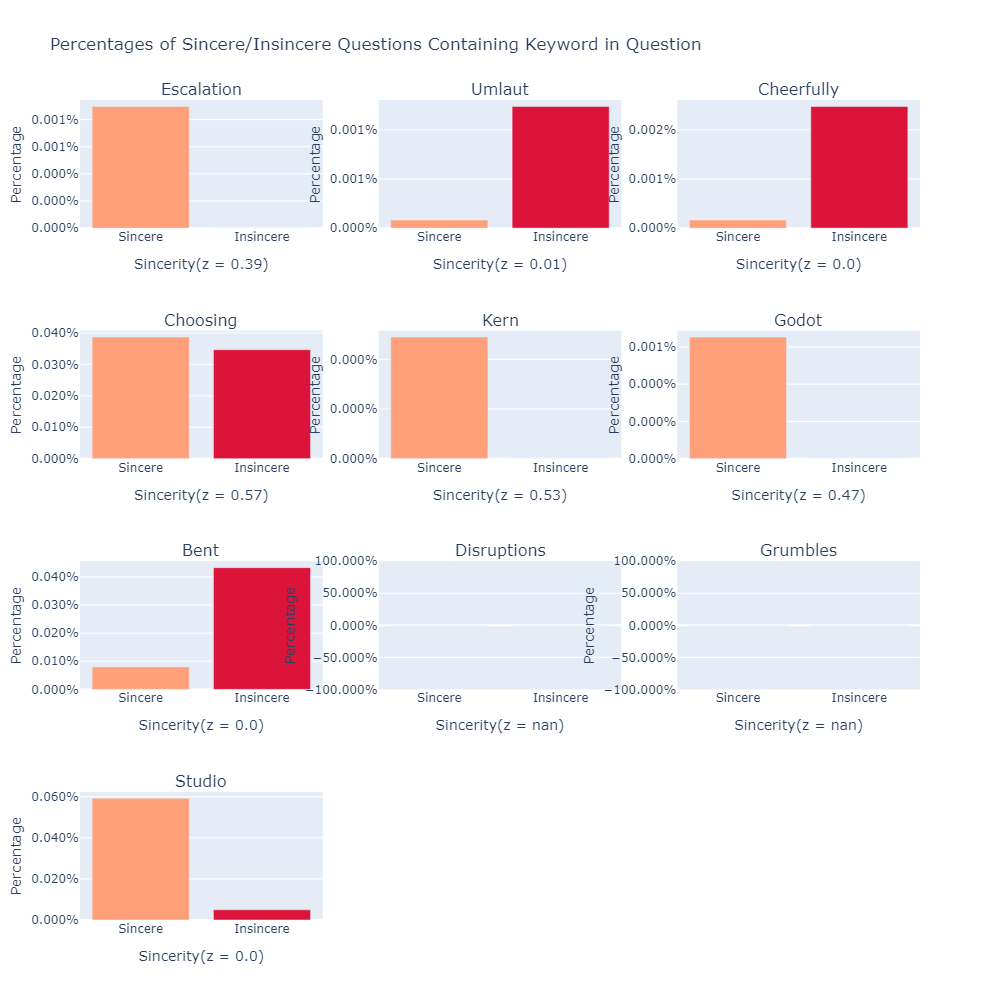

Unlike the controversial words, some words appear in similar proportions between the insincere and sincere questions, and the corresponding z-scores are high. This verifies that the controversial keywords previously observed are associated with the insincerity of a question.

### 5.4 Bag-of-Word / Tf-Idf Model

Using the bag-of-word and Tf-Idf algorithms (which create a matrix of Tf-Idf values for every word in the dataset) and classification algorithms (namely Multinomial Naive Bayes and Logistic Regression), a classification model predicting whether a question is sincere or not is created.

#### 5.4.1 Train-Test Split

A train set is split further into a train and test set, so that models can be fit on the train set and its performance is evaluated on the test set.

In [53]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [54]:
# splitting the dataset into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df.question_text, df.target, test_size=0.25)

#### 5.4.2 Multinomial Naive Bayes

A Tf/Idf-based classification model is created using the Multinomial Naive Bayes algorithm. To feed in the train set as is without manually creating the sparse matrix as doen above, a pipeline of several algorithms is created.

In [55]:
# Import Pipeline from Sci-kit Learn
from sklearn.pipeline import Pipeline

In [56]:
# Import Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [57]:
# Instantiate a Pipeline (Bag-of-Words -> Tf-IDF -> Multinomial Naive Bayes)
pipe_nb=Pipeline([
    ('bow',CountVectorizer()),    # Bag of Words
    ('tfidf',TfidfTransformer()),  # TF-IDF
    ('classifier',MultinomialNB())  # Classification using Multinomial Naive Bayes
])

In [58]:
# Train model through Pipeline
pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Now that a Naive Bayes classification model has been trained using the train set, the test set is used to predict the result.

In [59]:
# Make predictions
predictions_nb=pipe_nb.predict(X_test)

The performance of the Naive Bayes model is evaluated.

In [60]:
# Import Model Evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

In [61]:
# Print Classification Report for Multinomial Naive Bayes
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    306182
           1       0.74      0.07      0.12     20349

    accuracy                           0.94    326531
   macro avg       0.84      0.53      0.55    326531
weighted avg       0.93      0.94      0.92    326531



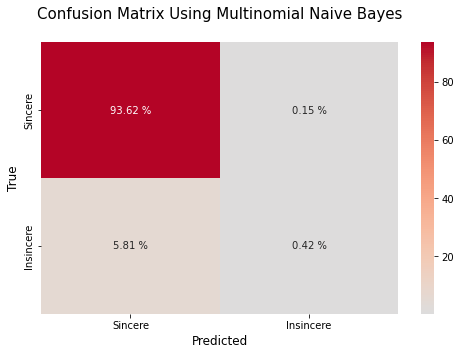

In [62]:
# Create Heatmap of Confusion Matrix for Multinomial Naive Bayes
plt.figure(figsize = (8,5))
ax = sns.heatmap(confusion_matrix(y_test, predictions_nb) / len(y_test) * 100, annot = True, cmap = 'coolwarm', fmt='.2f',
                center = 0)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.title('Confusion Matrix Using Multinomial Naive Bayes\n', size = 15)
plt.xlabel('Predicted', fontsize = 12)
plt.xticks([0.5, 1.5], ['Sincere', 'Insincere'])
plt.ylabel('True', fontsize = 12)
plt.yticks([0.5, 1.5], ['Sincere', 'Insincere'])
plt.show()

#### 5.4.3 Logistic Regression

The same process is repeated using Logistic Regression algorithm.

In [63]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [64]:
# Instantiate a Pipeline (Bag-of-Words -> Tf-IDF -> Logistic Regression)
pipe_lr = Pipeline([('bow', CountVectorizer()), # Bag of Words
                    ('tfidf', TfidfTransformer()), # TF-IDF
                    ('classifier', LogisticRegression()) # Classification using Logistic Regression
                    ])

In [65]:
# Train model through Pipeline
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

Now that a Logistic Regression model has been trained using the train set, the test set is used to predict the result.

In [66]:
# Make predictions
predictions_lr = pipe_lr.predict(X_test)

In [67]:
# Print Classification Report for Logistic Regression
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    306182
           1       0.67      0.36      0.47     20349

    accuracy                           0.95    326531
   macro avg       0.81      0.67      0.72    326531
weighted avg       0.94      0.95      0.94    326531



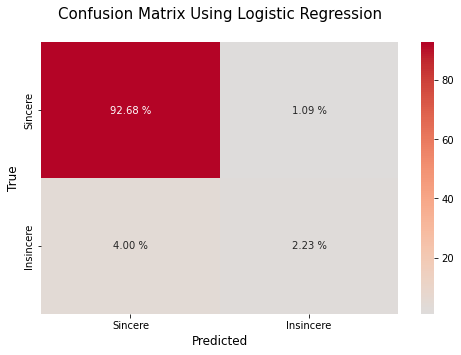

In [68]:
# Create Heatmap of Confusion Matrix for Logistic Regression
plt.figure(figsize = (8,5))
ax = sns.heatmap(confusion_matrix(y_test, predictions_lr) / len(y_test) * 100, annot = True, cmap = 'coolwarm', fmt='.2f',
                 center = 0)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.title('Confusion Matrix Using Logistic Regression\n', size = 15)
plt.xlabel('Predicted', fontsize = 12)
plt.xticks([0.5, 1.5], ['Sincere', 'Insincere'])
plt.ylabel('True', fontsize = 12)
plt.yticks([0.5, 1.5], ['Sincere', 'Insincere'])
plt.show()

### 5.5 Word2Vec Model

As an alternative to the BoW/Tf-Idf algorithm, the Word2Vec model created by Google is also used. The idea of this algorithm is to vectorize every word by assigning it a set of scores for multiple contexts. Then, the context of every document is determined by computing the average of all the word vectors in the document.

#### 5.5.1 Fitting Word2Vec Model

In [69]:
# Tokenize documents
X_train = X_train.str.split()
X_test = X_test.str.split()

In [70]:
# Import Gensim library which has the Word2Vec model
import gensim

In [71]:
# Fit a W2V model
w2v_model = gensim.models.Word2Vec(X_train, # Use words in X_train
                                   vector_size=100, # size of vector (i.e., number of contexts)
                                   window=5, # Number of words around each word to study context
                                   min_count=2) # Number of times a word must appear in corpus to create a word vector

As shown below, each word is now a vector.

In [72]:
# Show vector equivalent of the word 'apple'
w2v_model.wv.word_vec('apple')

array([-2.0060434 , -0.7030886 ,  0.08070701,  0.2901703 , -1.3890843 ,
       -1.1567142 ,  0.9703581 ,  0.0515853 ,  0.16337371, -1.24057   ,
        0.4789737 ,  0.33259904, -1.9703025 ,  0.6012701 , -0.39284003,
        1.0213896 ,  0.52184767, -0.5898297 ,  0.15724733,  0.13043217,
        0.91590035,  1.7471251 ,  0.5277471 ,  0.1423127 , -0.5209788 ,
       -1.7927172 , -0.56988126, -0.3361541 , -0.53376055, -0.98765695,
        0.4755558 ,  0.8413981 ,  0.54288024, -1.4488158 , -0.0149208 ,
        0.795552  , -0.45951092,  0.42758933,  0.5599407 ,  0.92118704,
       -0.75330144, -1.2288321 , -0.48626342,  1.6272901 ,  0.86340386,
       -0.7661579 , -0.747779  ,  0.4745134 , -0.49441233, -0.0785234 ,
        0.28231955, -1.238344  , -0.42142287,  0.51268065, -0.88080245,
        1.6489004 ,  2.1277487 ,  1.4732635 ,  0.8974332 ,  1.9146018 ,
        0.03688463, -0.2986506 ,  0.87264025,  1.1133279 ,  1.0187436 ,
        1.100761  ,  0.5023985 ,  1.3969122 ,  1.7894225 ,  1.33

In [73]:
# Create a set of all words appearing in the corpus
words = set(w2v_model.wv.index_to_key)

# Vectorize the train set
# for each word in the document, if the word is in the set of words,
# then add the word vector into a numpy array. Then, add the numpy array for each document
# to an array for the entire corpus.
X_train_vect = np.array([np.array([w2v_model.wv[word] for word in doc if word in words])
                         for doc in X_train]) 

# Vectorize the test set
# for each word in the document, if the word is in the set of words,
# then add the word vector into a numpy array. Then, add the numpy array for each document
# to an array for the entire corpus.
X_test_vect = np.array([np.array([w2v_model.wv[word] for word in doc if word in words])
                         for doc in X_test]) 

The above process has created a 2-D numpy array of 1-D word vectors of length 100 for each row (document) of the Data Frame (corpus). Since there are varying number of words in a document, the word vectors in each document are averaged elementwise such that each document contains a single, 100 long resultant vector. These averaged vectors contain the 'average context' of the document.

In [74]:
# Create an empty list of average vectors for the train set
X_train_vect_avg = []

for wv in X_train_vect: # Looping over the documents in the corpus
    if wv.size: # if the size of the numpy array for the document is not zero (i.e., if the document contains at least a word)
        X_train_vect_avg.append(wv.mean(axis=0)) # then average the word vectors and add to the word vector average
    else: # if a document contains no word after having been cleaned and tokenized
        X_train_vect_avg.append(np.zeros(100, dtype=float)) # Then create a null vector of length 300

# Create an empty list of average vectors for the train set
X_test_vect_avg = []
for wv in X_test_vect: # Looping over the documents in the corpus
    if wv.size: # if the size of the numpy array for the document is not zero (i.e., if the document contains at least a word)
        X_test_vect_avg.append(wv.mean(axis=0)) # then average the word vectors and add to the word vector average
    else: # if a document contains no word after having been cleaned and tokenized
        X_test_vect_avg.append(np.zeros(100, dtype=float)) # Then create a null vector of length 300

#### 5.5.2 Logistic Regression

A Word2Vec-based classification model is created using logistic regression. To feed in the train set as is without manually creating the sparse matrix as doen above, a pipeline of several algorithms is created.

In [75]:
# Instantiate a logistic regression model
lr = LogisticRegression()

# Fit logistic regression with the train set
lr_model = lr.fit(X_train_vect_avg, y_train)

Now that a Logistic Regression model has been trained using the train set, the test set is used to predict the result.

In [76]:
# Predict result with test set
predictions_lr_w2v = lr_model.predict(X_test_vect_avg)

In [77]:
# Print Classification Report for Logistic Regression
print(classification_report(y_test, predictions_lr_w2v))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    306182
           1       0.54      0.19      0.28     20349

    accuracy                           0.94    326531
   macro avg       0.74      0.59      0.62    326531
weighted avg       0.92      0.94      0.93    326531



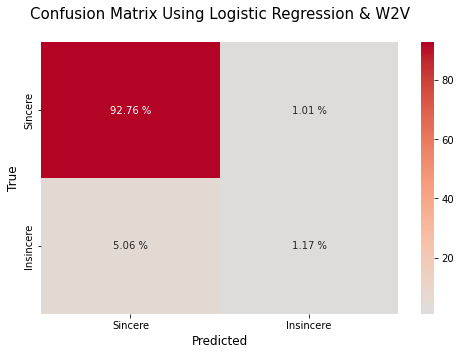

In [78]:
# Create Heatmap of Confusion Matrix for Logistic Regression
plt.figure(figsize = (8,5))
ax = sns.heatmap(confusion_matrix(y_test, predictions_lr_w2v) / len(y_test) * 100, annot = True, cmap = 'coolwarm', fmt='.2f',
                 center = 0)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.title('Confusion Matrix Using Logistic Regression & W2V\n', size = 15)
plt.xlabel('Predicted', fontsize = 12)
plt.xticks([0.5, 1.5], ['Sincere', 'Insincere'])
plt.ylabel('True', fontsize = 12)
plt.yticks([0.5, 1.5], ['Sincere', 'Insincere'])
plt.show()

#### 5.5.3 Random Forest

The same process is repeated using the Random Forest algorithm.

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train)

In [80]:
predictions_rf_w2v = rf_model.predict(X_test_vect_avg)

In [81]:
# Print Classification Report for Logistic Regression
print(classification_report(y_test, predictions_rf_w2v))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    306182
           1       0.70      0.22      0.33     20349

    accuracy                           0.95    326531
   macro avg       0.82      0.61      0.65    326531
weighted avg       0.93      0.95      0.93    326531



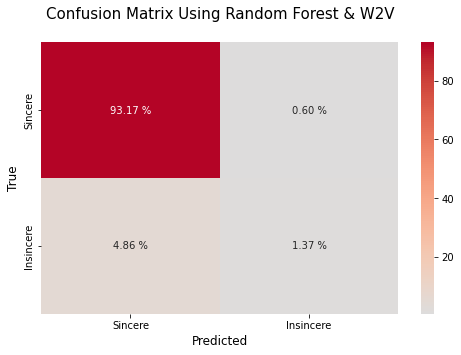

In [82]:
# Create Heatmap of Confusion Matrix for Random Forest
plt.figure(figsize = (8,5))
ax = sns.heatmap(confusion_matrix(y_test, predictions_rf_w2v) / len(y_test) * 100, annot = True, cmap = 'coolwarm', fmt='.2f',
                 center = 0)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.title('Confusion Matrix Using Random Forest & W2V\n', size = 15)
plt.xlabel('Predicted', fontsize = 12)
plt.xticks([0.5, 1.5], ['Sincere', 'Insincere'])
plt.ylabel('True', fontsize = 12)
plt.yticks([0.5, 1.5], ['Sincere', 'Insincere'])
plt.show()

In [83]:
precision = precision_score(y_test, predictions_rf_w2v)
recall = recall_score(y_test, predictions_rf_w2v)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 8), round(recall, 8), round((predictions_rf_w2v==y_test).sum()/len(predictions_rf_w2v), 8)))

Precision: 0.69628937 / Recall: 0.21947024 / Accuracy: 0.94539263


### 5.6 Model Comparison

The performances of the four models considered are compared.

In [84]:
# Create a list of model names
models = ['BoW/Tf-Idf Naive Bayes', 'BoW/Tf-Idf Logistic Regression', 'Word2Vec Logistic Regression',
         'Word2Vec Random Forest']

# Create a list of precisions
precisions = [precision_score(y_test, predictions_nb), precision_score(y_test, predictions_lr),
              precision_score(y_test, predictions_lr_w2v), precision_score(y_test, predictions_rf_w2v)]

# Create a list of recalls
recalls = [recall_score(y_test, predictions_nb), recall_score(y_test, predictions_lr),
          recall_score(y_test, predictions_lr_w2v), recall_score(y_test, predictions_rf_w2v)]

# Create a list of accuracies
accuracies = [accuracy_score(y_test, predictions_nb), accuracy_score(y_test, predictions_lr),
             accuracy_score(y_test, predictions_lr_w2v), accuracy_score(y_test, predictions_rf_w2v)]

# Create a list of F1 scores
f1_scores = [f1_score(y_test, predictions_nb), f1_score(y_test, predictions_lr),
            f1_score(y_test, predictions_lr_w2v), f1_score(y_test, predictions_rf_w2v)]

# Create a list of percentage of Type 1 errors (False Positives)
type1_pct = [(confusion_matrix(y_test, predictions_nb)/ len(y_test) * 100)[0, 1],
            (confusion_matrix(y_test, predictions_lr)/ len(y_test) * 100)[0, 1],
            (confusion_matrix(y_test, predictions_lr_w2v)/ len(y_test) * 100)[0, 1],
            (confusion_matrix(y_test, predictions_rf_w2v)/ len(y_test) * 100)[0, 1]]

# Create a list of percentage of Type 2 errors (False Negatives)
type2_pct = [(confusion_matrix(y_test, predictions_nb)/ len(y_test) * 100)[1, 0],
            (confusion_matrix(y_test, predictions_lr)/ len(y_test) * 100)[1, 0],
            (confusion_matrix(y_test, predictions_lr_w2v)/ len(y_test) * 100)[1, 0],
            (confusion_matrix(y_test, predictions_rf_w2v)/ len(y_test) * 100)[1, 0]]

# Create a DataFrame of results

results = pd.DataFrame({'Model' : models, 'Precision' : precisions, 'Recall' : recalls,
                        'F1 Score' : f1_scores, 'Accuracy' : accuracies,
                        'Type1 Error Percentage' : type1_pct, 'Type2 Error Percentage' : type2_pct})

results.head()

Model  Precision    Recall  F1 Score  Accuracy  \
0          BoW/Tf-Idf Naive Bayes   0.739316  0.068013  0.124567  0.940425   
1  BoW/Tf-Idf Logistic Regression   0.670878  0.357511  0.466451  0.949031   
2    Word2Vec Logistic Regression   0.537481  0.188510  0.279124  0.939320   
3          Word2Vec Random Forest   0.696289  0.219470  0.333744  0.945393   

   Type1 Error Percentage  Type2 Error Percentage  
0                0.149450                5.808024  
1                1.093005                4.003908  
2                1.010930                5.057100  
3                0.596574                4.864163

In [85]:
# Compare models

print('Summary Report')
print('-----------------\n')

for i in list(results.columns)[1:]:
    print(f'{i}:')
    
    for k ,j in enumerate(results['Model']):
        print(f'{j} : {round(results.loc[results.Model == j, i][k], 2)}')
    
    if i not in ['Type1 Error Percentage', 'Type2 Error Percentage']:
        model = results.loc[results[i] == results[i].max(), 'Model'].values[0]
        value = round(results[i].max(), 2)
        print(f'The model with the highest {i} is {model} ({value})')
    else:
        model = results.loc[results[i] == results[i].min(), 'Model'].values[0]
        value = round(results[i].min(), 2)
        print(f'The model with the lowest {i} is {model} ({value}%)')
    
    print('\n')

Summary Report
-----------------

Precision:
BoW/Tf-Idf Naive Bayes : 0.74
BoW/Tf-Idf Logistic Regression : 0.67
Word2Vec Logistic Regression : 0.54
Word2Vec Random Forest : 0.7
The model with the highest Precision is BoW/Tf-Idf Naive Bayes (0.74)


Recall:
BoW/Tf-Idf Naive Bayes : 0.07
BoW/Tf-Idf Logistic Regression : 0.36
Word2Vec Logistic Regression : 0.19
Word2Vec Random Forest : 0.22
The model with the highest Recall is BoW/Tf-Idf Logistic Regression (0.36)


F1 Score:
BoW/Tf-Idf Naive Bayes : 0.12
BoW/Tf-Idf Logistic Regression : 0.47
Word2Vec Logistic Regression : 0.28
Word2Vec Random Forest : 0.33
The model with the highest F1 Score is BoW/Tf-Idf Logistic Regression (0.47)


Accuracy:
BoW/Tf-Idf Naive Bayes : 0.94
BoW/Tf-Idf Logistic Regression : 0.95
Word2Vec Logistic Regression : 0.94
Word2Vec Random Forest : 0.95
The model with the highest Accuracy is BoW/Tf-Idf Logistic Regression (0.95)


Type1 Error Percentage:
BoW/Tf-Idf Naive Bayes : 0.15
BoW/Tf-Idf Logistic Regression 

Based on the review, Logistic Regression classification using bag-of-words and Tf-Idf algorithm is deemed the best model for the following reasons:

- The BoW/Tf-Idf Logistic Regression model has the highest F-1 score (the harmonic average of recall and precision) which means that, on average, this model has the highest probability of detecting the truly insincere questions.


- The BoW/Tf-Idf Logistic Regression model has the highest accuracy of 0.95


- While the BoW/Tf-Idf Naive Bayes model has the lowest Type 1 Error percentage (False positive - classfying a sincere question as insincere), The BoW/Tf-Idf Logistic Regression model has the lowest Type 2 Error percentage (False negative - classfying an insincere question as sincere). Considering the impacts of these two errors, it is considered more critical to allow toxic questions on the forum than to false determine a sincere question as insincere. 

### 5.7 Prediction & Review

With the final model selected as the BoW/Tf-Idf with Logistic Regression Classifier, the model that was originally trained based on the 75% split of the train set is retrained with the full train set. 

In [86]:
# Redefine X_train and y_train
X_train = df.question_text
y_train = df.target

The test set is read in and processed as was done for the train set.

In [87]:
# Read in test csv
df_test = pd.read_csv('test.csv')

In [88]:
df_test.head()

qid                                      question_text
0  0000163e3ea7c7a74cd7  Why do so many women become so rude and arroga...
1  00002bd4fb5d505b9161  When should I apply for RV college of engineer...
2  00007756b4a147d2b0b3  What is it really like to be a nurse practitio...
3  000086e4b7e1c7146103                             Who are entrepreneurs?
4  0000c4c3fbe8785a3090   Is education really making good people nowadays?

In [89]:
# Tokenize questions using genism.utils.simple_preprocess()
df_test['question_text_cleaned'] = df_test['question_text'].apply(lambda x : gensim.utils.simple_preprocess(x))

In [90]:
# Convert tokenized text column to a single string
df_test['question_text_cleaned'] = df_test['question_text_cleaned'].apply(lambda x : ' '.join(x))

In [91]:
# Apply function to all elements in text column 
df_test['question_text_cleaned'] = df_test.question_text_cleaned.apply(stopword_lemmatize_characters)

In [92]:
# Create the test set
X_test = df_test['question_text_cleaned']

The logistic regression model is fit again with the new train set.

In [93]:
# Train model through Pipeline
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

Finally, predictions are made with the train set.

In [94]:
# Make predictions
predictions_lr = pipe_lr.predict(X_test)

In [95]:
# Create a new column showing the prediction results
df_test['result'] = predictions_lr

Finally, the classified questions are randomly reviewed to visually confirm the performance of the model.

In [96]:
# Create a Series of questions classified as sincere by the model
sincere_questions = df_test.loc[df_test['result'] == 0, 'question_text']
sincere_questions.reset_index(drop = True, inplace = True)
print(f'Number of questions classified as sincere: {len(sincere_questions)}')

Number of questions classified as sincere: 363086


In [97]:
# Create a Series of questions classified as insincere by the model
insincere_questions = df_test.loc[df_test['result'] == 1, 'question_text']
insincere_questions.reset_index(drop = True, inplace = True)
print(f'Number of questions classified as sincere: {len(insincere_questions)}')

Number of questions classified as sincere: 12720


#### Sincere Questions

In [98]:
# Randomly draw 10 questions classified as sincere
for i in np.random.randint(0, len(sincere_questions), 10):
    print(f'{sincere_questions[i]}\n\n')

How do I narrow down my interests when I am interested in everything except maths?


Why Mukund Kumar prefers Apple over Google?


How can we get people to recognize the difference between fully automatic, semi automatic and burst fire instead of just saying "automatic" when it comes to gun control arguments?


What is the basic general knowledge everyone should pocess?


What will Trump's 'ultimate deal' mean for Palestinians?


Why do people who think the Iraq war was wrong want the USA to get involved in Syria?


How do I refriend someone on Snapchat?


If you could make a difference in your own life, what would that be?


Why is Phillipines a shithole country compare to Malaysia and Singapore?


Why is Queen Mab important to Act 1: Scene 4? Why do you think Mercutio used her as a reference to help Romeo?




#### Insincere Questions

In [99]:
# Randomly draw 10 questions classified as insincere
for i in np.random.randint(0, len(insincere_questions), 10):
    print(f'{insincere_questions[i]}\n\n')

Is it time more people in the US, Democrat and otherwise, realize that there is no such thing as "reproductive rights" and that you get pregnant when God demands you get pregnant?


Are black conservatives legitimately black?


What noise would a castrated Wookie make?


How I sex with my mom?


If Bernie Sanders got elected president in 2020 do you think Republican news outlets like Fox News and Republic lawmakers across the country would start using Anti-Semitic vitriol against him?


Is it gay to eat your sperm out of a chick after you have blown in her I personally believe it has gay or bi tendencies?


How racist are Russian youths?


What is the contribution of Israels Muslim population to its society?


Why do South Korean people despise Japanese people? What are the real reasons?


What if Britain just shoots down one of these stupid Russian bombers that keep flying into our airspace?




It can be seen that the questions classified as insincere contain vulgar languages noticeably more frequently. Also, many of these questions are related to politics, race, sex, religion, crime, and a specific country or countries as was noted during the exploratory data analysis (EDA).   

#### Save as csv

Finally, the final result is saved as csv into the local server.

In [100]:
# Create an empty Data 
df_final = pd.DataFrame()

# Assign columns
df_final[['qid', 'prediction']] = df_test[['qid', 'result']]

# Set qid as index
df_final.set_index('qid', inplace = True)

In [101]:
# Save as csv
df_final.to_csv('predictions.csv')